In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('classification220718/train.csv')
test = pd.read_csv('classification220718//test.csv')

In [3]:
total = pd.concat([train, test])

In [4]:
train.income = (train['income']==('>50K')).astype('int')

In [5]:
total = pd.concat([train, test])

In [6]:
total

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0.0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0.0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0.0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0.0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,NaN
19533,48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,NaN
19534,48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States,NaN
19535,48841,18,Private,150817,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,NaN


In [7]:
total = total.drop(labels=['no', 'fnlwgt', 'education'], axis=1)

# Age

In [8]:
age_labels = [i for i in range(19)]
age_bands = [i for i in range(15, 72, 3)] + [90]
total['age-band']= pd.cut(total['age'], bins=age_bands, labels=age_labels)

In [9]:
total = total.drop('age', axis=1)

# Workclass

In [10]:
total.loc[total['workclass'].isin(['Never-worked', 'Without-pay']), 'workclass'] = 'others'

In [11]:
total

,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age-band
0,Private,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0.0,3
1,Private,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0.0,7
2,Private,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0.0,6
3,Private,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0.0,16
4,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,Self-emp-not-inc,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,NaN,9
19533,Private,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,NaN,10
19534,Private,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States,NaN,15
19535,Private,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,NaN,0


In [12]:
total['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', '?', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'others'], dtype=object)

# Education Num

In [13]:
edu_bands = [0, 1, 5, 8, 10, 12, 13, 14, 16]
edu_labels = [i for i in range(len(edu_bands)-1)]
total['edu-band']= pd.cut(total['education-num'], bins=edu_bands, labels=edu_labels)

In [14]:
total=total.drop('education-num', axis=1)

# Captial Gain & Loss

In [15]:
total["log-capital-gain"] = total['capital-gain'].map(lambda x: np.log(x, where=(x!=0)))

In [16]:
total["log-capital-loss"] = total['capital-loss'].map(lambda x: np.log(x, where=(x!=0)))

In [17]:
total = total.drop(['capital-gain', 'capital-loss'], axis=1)

# Hours Per Week

In [18]:
workhours_bands = [i for i in range(0, 65, 5)] + [80, 100]
workhours_labels = [i for i in range(len(workhours_bands) -1)]
total['workhours-band']= pd.cut(total['hours-per-week'], bins=workhours_bands, labels=workhours_labels)

In [19]:
total = total.drop(['hours-per-week'], axis=1)

# 7. Marital Status & Relationship

In [20]:
total.loc[total['relationship'].isin(['Husband', 'Wife']), 'relationship'] = 'Normal'
total.loc[total['relationship'].isin(['Own-child', 'Not-in-family', 'Unmarried', 'Other-relative']), 'relationship'] = 'Abnormal'

In [21]:
total.loc[total['marital-status'].isin(['Married-AF-spouse', 'Married-civ-spouse']), 'marital-status'] = 'Married_OK'
total.loc[total['marital-status'].isin(['Married-spouse-absent', 'Divorced', 'Never-married', 'Separated', 'Widowed']), 'marital-status']= 'Married-Fail'

# 8. Occupations

In [22]:
total.loc[total['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'occupation'] = 'Priv-house-serv'

# 9. Race

In [23]:
total.loc[total['race'].isin(['Amer-Indian-Eskimo', 'Other']), 'race'] = 'Other'

# 10. Native Country

In [24]:
income_01 = ['Outlying-US(Guam-USVI-etc)',
 'Honduras',
 'Columbia',
 'Dominican-Republic',
 'Mexico',
 'Guatemala',
 'Portugal',
 'Trinadad&Tobago',
 'Nicaragua',
 'Peru',
 'Vietnam',
 'El-Salvador',]

income_02 = ['Jamaica',
 'Haiti',
 'Puerto-Rico',
 'Laos',
 'Thailand',
 'Ecuador',
 'Poland',
 'South',
 'Ireland',
 'China',]

income_03 = ['?']

income_04 = [
    'United-States',
]
income_05 = [
 'Greece',
 'Scotland',
 'Cuba',
 'Hungary',
 'Hong',
]
income_06 = [
 'Philippines',
 'Canada',
 'England',
 'Germany',
 'Italy'
]
income_07 = [
 'India',
 'Japan',
 'France',
 'Yugoslavia',
 'Cambodia',
 'Taiwan',
 'Iran'
]

In [25]:
# income_01 = ['Jamaica',
#  'Haiti',
#  'Puerto-Rico',
#  'Laos',
#  'Thailand',
#  'Ecuador',]

# income_02 = ['Outlying-US(Guam-USVI-etc)',
#  'Honduras',
#  'Columbia',
#  'Dominican-Republic',
#  'Mexico',
#  'Guatemala',
#  'Portugal',
#  'Trinadad&Tobago',
#  'Nicaragua',
#  'Peru',
#  'Vietnam',
#  'El-Salvador',]

# income_03 = ['Poland',
#  'Ireland',
#  'South',
#  'China',]

# income_04 = [
#     'United-States',
# ]
# income_05 = [
#  'Greece',
#  'Scotland',
#  'Cuba',
#  'Hungary',
#  'Hong',
#  'Holand-Netherlands',
# ]
# income_06 = [
#  'Philippines',
#  'Canada',
# ]
# income_07 = [
#  'England',
#  'Germany',
# ]

# income_08 = [
#  'Italy',
#  'India',
#  'Japan',
#  'France',
#  'Yugoslavia',
#  'Cambodia',
# ]

# income_09 = [
#  'Taiwan',
#  'Iran',
# ]

# income_other=['?', ]

In [26]:
def convert_country(x):
    if x in income_01:
        return 'income_01'
    elif x in income_02:
        return 'income_02'
    elif x in income_03:
        return 'income_03'
    elif x in income_04:
        return 'income_04'
    elif x in income_05:
        return 'income_05'
    elif x in income_06:
        return 'income_06'
    elif x in income_07:
        return 'income_07'

In [27]:
total['country-bin'] = total['native-country'].apply(convert_country)

In [28]:
total = total.drop(['native-country'], axis = 1)

# Features to Model

In [29]:
total.columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'income', 'age-band', 'edu-band', 'log-capital-gain',
       'log-capital-loss', 'workhours-band', 'country-bin'],
      dtype='object')

In [30]:
features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'age-band', 'edu-band', 'log-capital-gain',
       'log-capital-loss', 'workhours-band', 'country-bin']
label = ['income']

In [31]:
!pip3 install jinja2==3.0.1
!pip install pycaret
from pycaret.datasets import get_data
from pycaret.classification import *

  Using cached numpy-1.20.3-cp37-cp37m-win_amd64.whl (13.6 MB)
  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Rolling back uninstall of numpy
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy-1.21.5.dist-info\
   from c:\users\ai\anaconda3\envs\python3713\lib\site-packages\~umpy-1.21.5.dist-info
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy\__config__.py
   from C:\Users\AI\AppData\Local\Temp\pip-uninstall-v6cuz8r2\__config__.py
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\AI\AppData\Local\Temp\pip-uninstall-v6cuz8r2\__init__.cython-30.pxd
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy\__init__.pxd
   from C:\Users\AI\AppData\Local\Temp\pip-uninstall-v6cuz8r2\__init__.pxd
  

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\AI\\Anaconda3\\envs\\python3713\\Lib\\site-packages\\numpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [32]:
total_carret = total[features + label]

In [33]:
total_carret.head()

,workclass,marital-status,occupation,relationship,race,sex,age-band,edu-band,log-capital-gain,log-capital-loss,workhours-band,country-bin,income
0,Private,Married-Fail,Machine-op-inspct,Abnormal,White,Male,3,2,NaN,7.097015e-312,7,income_04,0.0
1,Private,Married-Fail,Other-service,Abnormal,White,Female,7,3,0.0,7.450661e+00,10,income_04,0.0
2,Private,Married-Fail,Handlers-cleaners,Abnormal,Asian-Pac-Islander,Female,6,5,0.0,1.721000e+03,9,income_02,0.0
3,Private,Married-Fail,Tech-support,Abnormal,White,Female,16,4,0.0,0.000000e+00,7,income_04,0.0
4,Private,Married_OK,Transport-moving,Normal,White,Male,2,3,0.0,0.000000e+00,12,income_04,0.0


In [34]:
total_carret['age-band'] = total_carret['age-band'].astype('float')
total_carret['edu-band'] = total_carret['edu-band'].astype('float')
total_carret['workhours_band'] = total_carret['workhours-band'].astype('float')
total_carret['log-capital-gain'] = total_carret['log-capital-gain'].astype('float')
total_carret['log-capital-loss'] = total_carret['log-capital-loss'].astype('float')

In [35]:
train_clean = total_carret[:len(train)]
test_clean = total_carret[len(train):]

In [36]:
train_clean['income'] = train_clean['income'].astype('int')

In [37]:
train_clean.head()

,workclass,marital-status,occupation,relationship,race,sex,age-band,edu-band,log-capital-gain,log-capital-loss,workhours-band,country-bin,income,workhours_band
0,Private,Married-Fail,Machine-op-inspct,Abnormal,White,Male,3.0,2.0,NaN,7.097015e-312,7,income_04,0,7.0
1,Private,Married-Fail,Other-service,Abnormal,White,Female,7.0,3.0,0.0,7.450661e+00,10,income_04,0,10.0
2,Private,Married-Fail,Handlers-cleaners,Abnormal,Asian-Pac-Islander,Female,6.0,5.0,0.0,1.721000e+03,9,income_02,0,9.0
3,Private,Married-Fail,Tech-support,Abnormal,White,Female,16.0,4.0,0.0,0.000000e+00,7,income_04,0,7.0
4,Private,Married_OK,Transport-moving,Normal,White,Male,2.0,3.0,0.0,0.000000e+00,12,income_04,0,12.0


In [38]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [39]:
!pip install pycaret

  Using cached numpy-1.20.3-cp37-cp37m-win_amd64.whl (13.6 MB)
  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\AI\\Anaconda3\\envs\\python3713\\Lib\\site-packages\\numpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Rolling back uninstall of numpy
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy-1.21.5.dist-info\
   from c:\users\ai\anaconda3\envs\python3713\lib\site-packages\~umpy-1.21.5.dist-info
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy\__config__.py
   from C:\Users\AI\AppData\Local\Temp\pip-uninstall-pvno0uno\__config__.py
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\AI\AppData\Local\Temp\pip-uninstall-pvno0uno\__init__.cython-30.pxd
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy\__init__.pxd
   from C:\Users\AI\AppData\Local\Temp\pip-uninstall-pvno0uno\__init__.pxd
  Moving to c:\users\ai\anaconda3\envs\python3713\lib\site-packages\numpy\__init__.py
   from C:\Users\AI\AppData\Local\Temp\pip

In [40]:
setup(data = train_clean, target = 'income', session_id=1234, silent=True, data_split_shuffle=True, fold_shuffle=True)

,Description,Value
0,session_id,1234
1,Target,income
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29305, 14)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


(False,
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x14e862b55c8>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x14e862b5748>,
  'nb': <pycaret.containers.models.classification.GaussianNBClassifierContainer at 0x14e862b5988>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x14e862b5a48>,
  'svm': <pycaret.containers.models.classification.SGDClassifierContainer at 0x14e862b5e88>,
  'rbfsvm': <pycaret.containers.models.classification.SVCClassifierContainer at 0x14e862bb408>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x14e862bb588>,
  'mlp': <pycaret.containers.models.classification.MLPClassifierContainer at 0x14e862bb648>,
  'ridge': <pycaret.containers.models.classification.RidgeClassifierContainer at 0x14e862bba88>,
  'rf': <pycaret.containers.models.classification.RandomForestClassifierContainer at 0x14e862b5f08>,


In [41]:
compared_model = compare_models(sort = 'F1', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.3420
nb,Naive Bayes,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0250
dt,Decision Tree Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0180
ridge,Ridge Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0220
rf,Random Forest Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.1050
ada,Ada Boost Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0170
lda,Linear Discriminant Analysis,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.1190
et,Extra Trees Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0890
lightgbm,Light Gradient Boosting Machine,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0300
dummy,Dummy Classifier,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0170


In [42]:
blended_model = blend_models(estimator_list = compared_model, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
3,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
4,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
Mean,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000


In [66]:
final_model = finalize_model(blended_model)
ensemble_prediction = predict_model(final_model,test_clean)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0,0,0,0,0,0,0


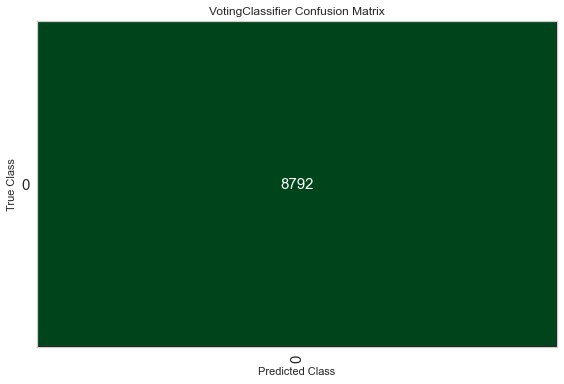

In [67]:
plot_model(estimator = final_model, plot = 'auc')
plot_model(estimator = final_model, plot = 'confusion_matrix')

In [68]:
ensemble_prediction['id'] = np.arange(len(ensemble_prediction))
ensemble_prediction['prediction'] = ensemble_prediction['Label']

In [76]:
ensemble_prediction = pd.read_csv("./classification220718/sample_submission.csv")

In [77]:
ensemble_prediction = ensemble_prediction[['no','income']]

In [78]:
ensemble_prediction.columns = ["no", "income"]
ensemble_prediction

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [80]:
ensemble_prediction.to_csv('submission.csv',index=False)

In [81]:
ensemble_prediction

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0
